In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("DryBeanDataSet.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


# dataset characterization

In [3]:
df['Extent'] = df['Extent'].replace('?',np.nan)
df['Extent'] = pd.to_numeric(df['Extent'], errors='coerce')
df['Compactness'] = df['Compactness'].replace('?', np.nan)
df['Compactness'] = pd.to_numeric(df['Compactness'], errors='coerce')
df['ShapeFactor6'] = df['ShapeFactor6'].replace('?', np.nan)
df['ShapeFactor6'] = pd.to_numeric(df['ShapeFactor6'], errors='coerce')

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13605.000000,13611.000000,13611.000000,13593.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13606.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,0.902873,4.762541e+02,0.749747,0.987143,0.873282,0.799886,0.006564,0.001716,0.643590,2.368097,0.995063,89.358603,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,0.296142,2.583687e+04,0.049085,0.004660,0.059520,0.061684,0.001128,0.000596,0.098996,0.871619,0.004366,51.838555,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,0.000000,1.614174e-01,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.695579,0.947687,0.000466,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,1.000000,2.150680e+02,0.718641,0.985670,0.832096,0.762577,0.005900,0.001154,0.581359,1.614151,0.993703,45.258826,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,1.000000,2.384380e+02,0.759874,0.988283,0.883157,0.801291,0.006645,0.001694,0.642044,2.368757,0.996386,88.766670,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,1.000000,2.794522e+02,0.786852,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,3.115695,0.997883,134.273148,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,1.000000,3.014441e+06,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,3.966119,0.999733,178.985023,0.999985


In [5]:
numeric_df = df.select_dtypes(include=['number'])

In [6]:
for column in numeric_df.columns:
    unique_count = df[column].nunique()
    print(f'Column {column} has {unique_count} unique values.')

Column Area has 12011 unique values.
Column Perimeter has 13351 unique values.
Column MajorAxisLength has 13543 unique values.
Column MinorAxisLength has 13543 unique values.
Column AspectRation has 13543 unique values.
Column Eccentricity has 13543 unique values.
Column ConvexArea has 12066 unique values.
Column Constantness has 2 unique values.
Column EquivDiameter has 12012 unique values.
Column Extent has 13529 unique values.
Column Solidity has 13526 unique values.
Column roundness has 13543 unique values.
Column Compactness has 13525 unique values.
Column ShapeFactor1 has 13543 unique values.
Column ShapeFactor2 has 13543 unique values.
Column ShapeFactor3 has 13543 unique values.
Column ShapeFactor4 has 13611 unique values.
Column ShapeFactor5 has 13543 unique values.
Column ShapeFactor6 has 13606 unique values.
Column Sort order has 13611 unique values.


In [7]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order'],
      dtype='object')

Constantness, Colour, Class

In [8]:
df['Class'].value_counts()

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
?             17
Name: Class, dtype: int64

In [9]:
521/df.shape[0]

0.03827786349276321

# Missing values

In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
for i in df.columns:
    df_temp = df[i]
    print(df_temp[pd.isnull(df_temp)])

Series([], Name: Area, dtype: int64)
Series([], Name: Perimeter, dtype: float64)
Series([], Name: MajorAxisLength, dtype: float64)
Series([], Name: MinorAxisLength, dtype: float64)
Series([], Name: AspectRation, dtype: float64)
Series([], Name: Eccentricity, dtype: float64)
Series([], Name: ConvexArea, dtype: int64)
Series([], Name: Constantness, dtype: int64)
Series([], Name: EquivDiameter, dtype: float64)
1175    NaN
2316    NaN
2317    NaN
3003    NaN
3149    NaN
3156    NaN
Name: Colour, dtype: object
2831   NaN
2832   NaN
5125   NaN
5846   NaN
5999   NaN
6681   NaN
Name: Extent, dtype: float64
Series([], Name: Solidity, dtype: float64)
Series([], Name: roundness, dtype: float64)
104     NaN
484     NaN
788     NaN
902     NaN
1244    NaN
2042    NaN
2803    NaN
3982    NaN
5963    NaN
8813    NaN
9701    NaN
9702    NaN
9914    NaN
10015   NaN
10134   NaN
10234   NaN
10294   NaN
10325   NaN
Name: Compactness, dtype: float64
Series([], Name: ShapeFactor1, dtype: float64)
Series([],

In [12]:
df.isna().sum().sum()

52

In [13]:
52/df.shape[0]

0.0038204393505253103

In [14]:
df.dropna(subset=['Class'], inplace=True)

# Outliers

In [15]:
outliers = []

In [16]:
def left_outlier_threshold(df,column):
    first_quartile = df[column].quantile(0.25)
    print(f"first_quartile : {first_quartile}")
    outlier_diff = df[column].quantile(0.5) - df[column].quantile(0.25)
    print(f"outlier_diff: {outlier_diff}")
    threshold = first_quartile - 5*outlier_diff
    print(f"threshold: {threshold}")
    return(threshold)

def right_outlier_threshold(df,column):
    third_quartile = df[column].quantile(0.75)
    print(f"third_quartile: {third_quartile}")
    outlier_diff = df[column].quantile(0.75) - df[column].quantile(0.5)
    print(f"outlier_diff: {outlier_diff}")
    threshold = 5*outlier_diff + third_quartile
    print(f"threshold: {threshold}")
    return(threshold)
    

In [17]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order'],
      dtype='object')

## Area

<AxesSubplot:ylabel='Frequency'>

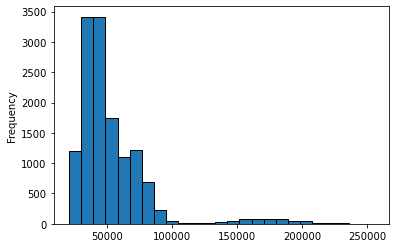

In [18]:
df['Area'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

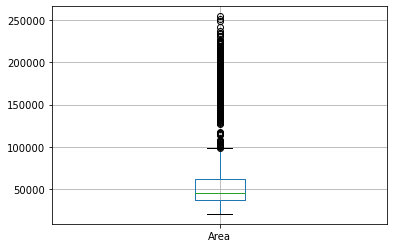

In [19]:
df.boxplot(column='Area')

bimodal

## Perimeter

<AxesSubplot:ylabel='Frequency'>

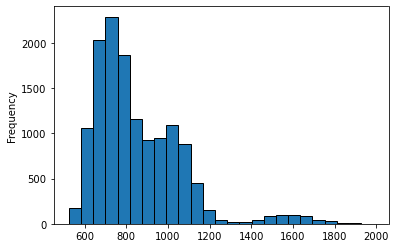

In [20]:
df['Perimeter'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

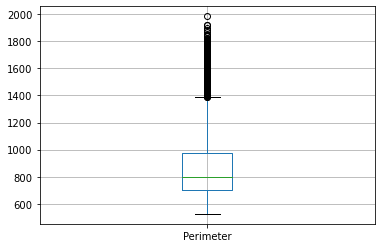

In [21]:
df.boxplot(column='Perimeter')

bimodal

## MajorAxisLength

<AxesSubplot:ylabel='Frequency'>

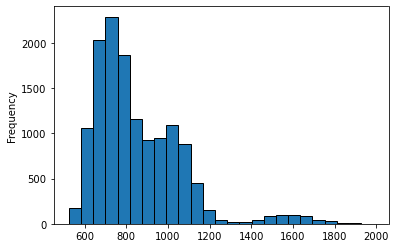

In [22]:
df['Perimeter'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

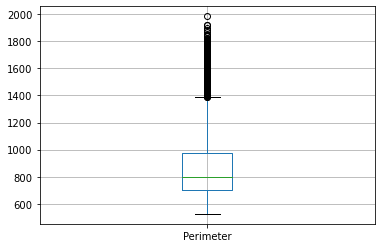

In [23]:
df.boxplot(column='Perimeter')

Bimodal

## MinorAxisLength

<AxesSubplot:ylabel='Frequency'>

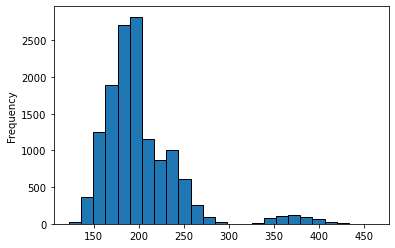

In [24]:
df['MinorAxisLength'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

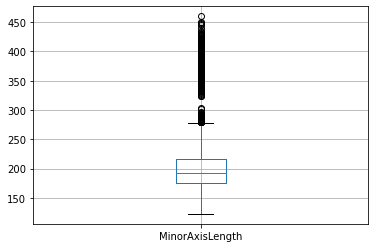

In [25]:
df.boxplot(column='MinorAxisLength')

Bimodal

## AspectRation

<AxesSubplot:ylabel='Frequency'>

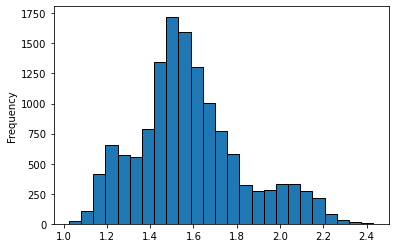

In [26]:
df['AspectRation'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

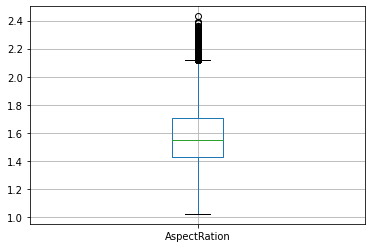

In [27]:
df.boxplot(column='AspectRation')

skewed to right

In [28]:
threshold = right_outlier_threshold(df,'AspectRation')

third_quartile: 1.7073706754662
outlier_diff: 0.1561557370214448
threshold: 2.488149360573424


In [29]:
df[df['AspectRation'] > threshold].index

Int64Index([], dtype='int64')

## Eccentricity

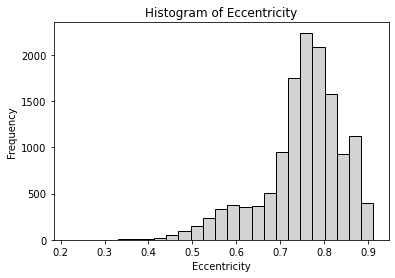

In [30]:
df['Eccentricity'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

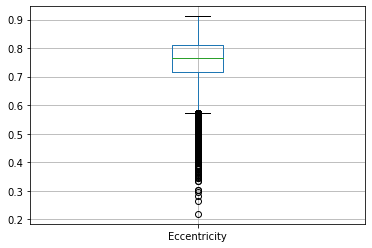

In [31]:
df.boxplot(column='Eccentricity')

Skewed to left

In [32]:
threshold = left_outlier_threshold(df,'Eccentricity')
df[df['Eccentricity'] < threshold].index

first_quartile : 0.715888281356496
outlier_diff: 0.048584512426034565
threshold: 0.47296571922632313


Int64Index([  210,   237,   452,   482,   589,   743,   827,   841,  1036,
             1224,
            ...
            12719, 12783, 12814, 12954, 13017, 13153, 13250, 13390, 13494,
            13536],
           dtype='int64', length=121)

In [33]:
outliers.extend(df[df['Eccentricity'] < threshold].index)

## ConvexArea

<AxesSubplot:ylabel='Frequency'>

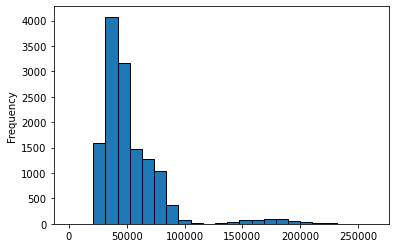

In [34]:
df['ConvexArea'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

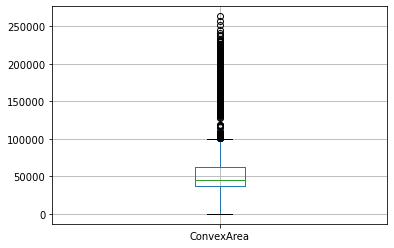

In [35]:
df.boxplot(column='ConvexArea')

In [36]:
df[df['ConvexArea'] < 0].index

Int64Index([3941], dtype='int64')

## EquivDiameter

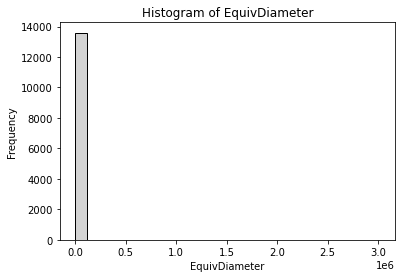

In [37]:
df['EquivDiameter'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of EquivDiameter')
plt.xlabel('EquivDiameter')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

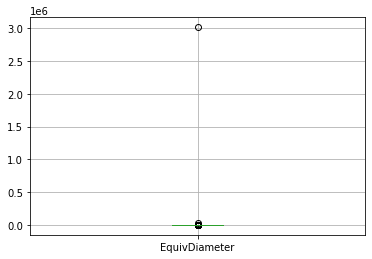

In [38]:
df.boxplot(column='EquivDiameter')

In [39]:
df[df['EquivDiameter'] > 10000].index

Int64Index([2762, 4780], dtype='int64')

In [40]:
outliers.extend(df[df['EquivDiameter'] > 10000].index)

## Extent

<AxesSubplot:ylabel='Frequency'>

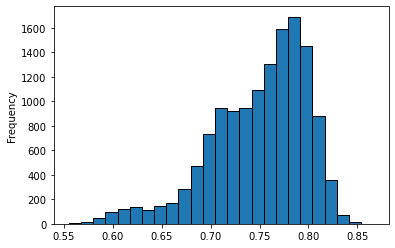

In [41]:
df['Extent'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

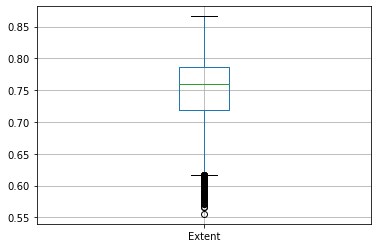

In [42]:
df.boxplot(column='Extent')

Skewed to left

In [43]:
threshold = left_outlier_threshold(df,'Extent')
df[df['Extent'] < threshold].index

first_quartile : 0.7186344301342618
outlier_diff: 0.04123194979175415
threshold: 0.512474681175491


Int64Index([], dtype='int64')

## Solidity

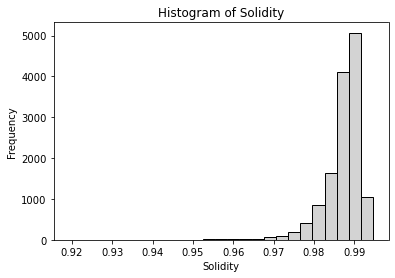

In [44]:
df['Solidity'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of Solidity')
plt.xlabel('Solidity')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

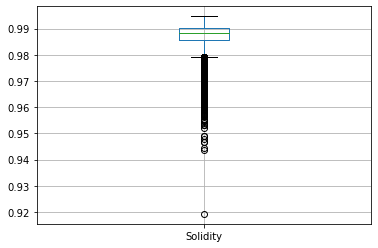

In [45]:
df.boxplot(column='Solidity')

In [46]:
threshold = left_outlier_threshold(df,'Solidity')
df[df['Solidity'] < threshold].index

first_quartile : 0.9856709036116484
outlier_diff: 0.0026141337601390813
threshold: 0.972600234810953


Int64Index([  100,   102,   350,   381,   409,   453,   573,   587,   798,
              815,
            ...
            12771, 12934, 12960, 13345, 13391, 13450, 13474, 13538, 13540,
            13593],
           dtype='int64', length=214)

In [47]:
outliers.extend(df[df['Solidity'] < threshold].index)

## roundness

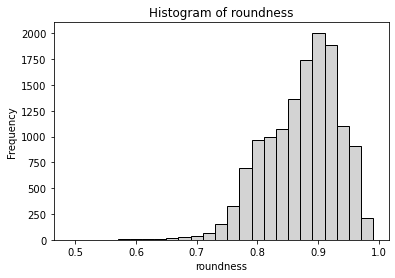

In [48]:
df['roundness'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of roundness')
plt.xlabel('roundness')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

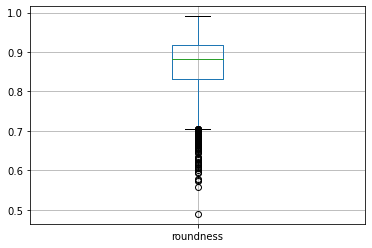

In [49]:
df.boxplot(column='roundness')

skewed to the left

In [50]:
threshold = left_outlier_threshold(df,'roundness')
df[df['roundness'] < threshold].index

first_quartile : 0.8321590537087578
outlier_diff: 0.05100851859214628
threshold: 0.5771164607480264


Int64Index([965, 1672, 7800, 11714], dtype='int64')

In [51]:
outliers.extend(df[df['roundness'] < threshold].index)

## Compactness

<AxesSubplot:ylabel='Frequency'>

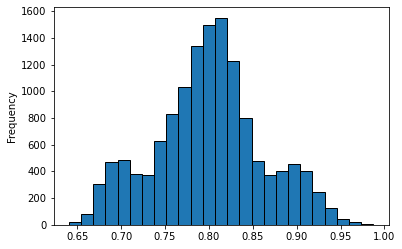

In [52]:
df['Compactness'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

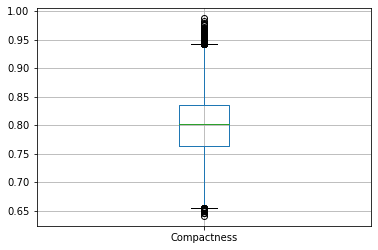

In [53]:
df.boxplot(column='Compactness')

## ShapeFactor1

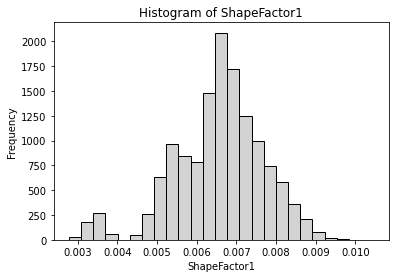

In [54]:
df['ShapeFactor1'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of ShapeFactor1')
plt.xlabel('ShapeFactor1')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

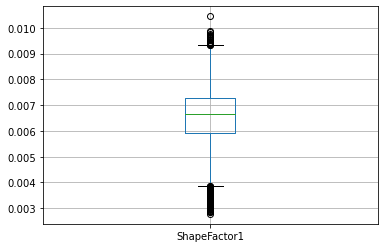

In [55]:
df.boxplot(column='ShapeFactor1')

In [56]:
threshold = right_outlier_threshold(df,'ShapeFactor1')
df[df['ShapeFactor1'] > threshold].index

third_quartile: 0.007271238359103128
outlier_diff: 0.0006256232445351331
threshold: 0.010399354581778793


Int64Index([6715], dtype='int64')

In [57]:
outliers.extend(df[df['ShapeFactor1'] > threshold].index)

## ShapeFactor2

<AxesSubplot:ylabel='Frequency'>

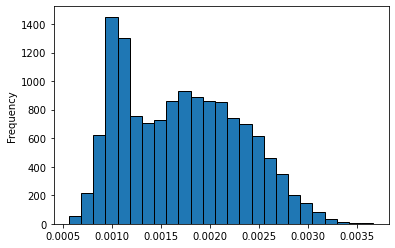

In [58]:
df['ShapeFactor2'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

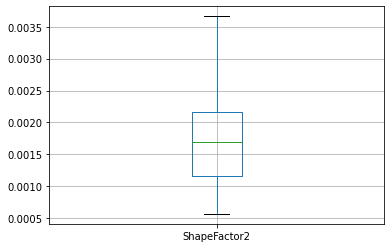

In [59]:
df.boxplot(column='ShapeFactor2')

## ShapeFactor3

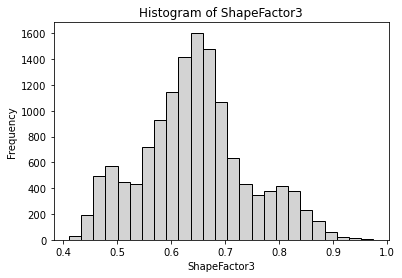

In [60]:
df['ShapeFactor3'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of ShapeFactor3')
plt.xlabel('ShapeFactor3')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

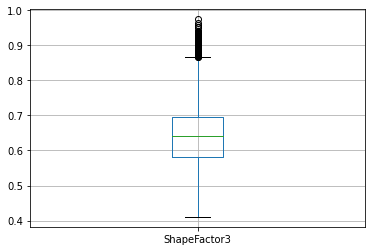

In [61]:
df.boxplot(column='ShapeFactor3')

In [62]:
threshold = right_outlier_threshold(df,'ShapeFactor3')
df[df['ShapeFactor3'] > threshold].index

third_quartile: 0.6960297517783589
outlier_diff: 0.05405205445211547
threshold: 0.9662900240389363


Int64Index([3228], dtype='int64')

In [63]:
outliers.extend(df[df['ShapeFactor3'] > threshold].index)

## ShapeFactor4

<AxesSubplot:ylabel='Frequency'>

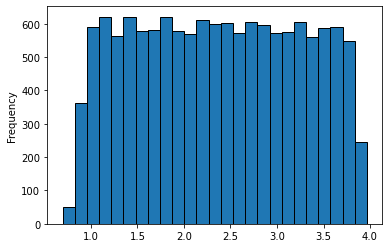

In [64]:
df['ShapeFactor4'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

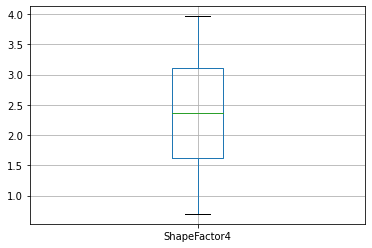

In [65]:
df.boxplot(column='ShapeFactor4')

## ShapeFactor5

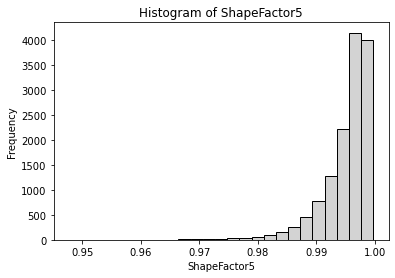

In [66]:
df['ShapeFactor5'].plot(kind='hist', bins=25, edgecolor='black',color='lightgrey')
plt.title('Histogram of ShapeFactor5')
plt.xlabel('ShapeFactor5')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

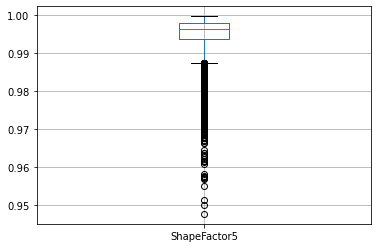

In [67]:
df.boxplot(column='ShapeFactor5')

In [68]:
threshold = left_outlier_threshold(df,'ShapeFactor5')
df[df['ShapeFactor5'] < threshold].index

first_quartile : 0.9937019933843481
outlier_diff: 0.0026846699058808987
threshold: 0.9802786438549436


Int64Index([  102,   147,   350,   573,   587,   798,   815,   983,  1043,
             1166,
            ...
            12934, 12960, 13022, 13217, 13345, 13391, 13450, 13496, 13540,
            13593],
           dtype='int64', length=177)

In [69]:
outliers.extend(df[df['ShapeFactor5'] < threshold].index)

## ShapeFactor6

<AxesSubplot:ylabel='Frequency'>

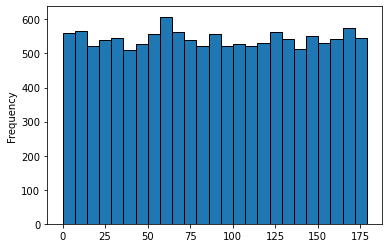

In [70]:
df['ShapeFactor6'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

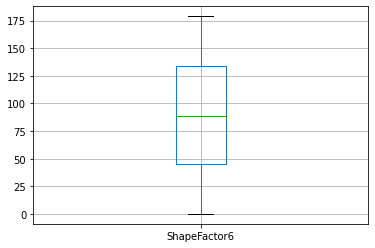

In [71]:
df.boxplot(column='ShapeFactor6')

## Sort order

<AxesSubplot:ylabel='Frequency'>

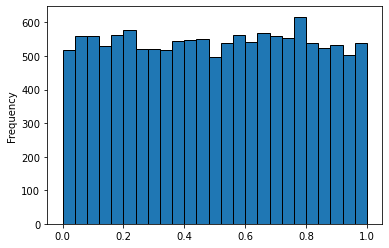

In [72]:
df['Sort order'].plot(kind='hist', bins=25, edgecolor='black')

<AxesSubplot:>

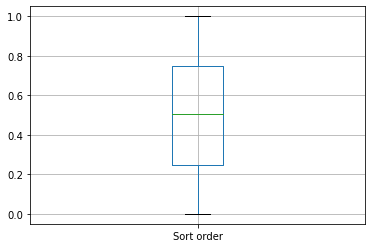

In [73]:
df.boxplot(column='Sort order')

In [74]:
len(set(outliers))

389

In [75]:
389/df.shape[0]

0.028615565690745918

## Outlier plots

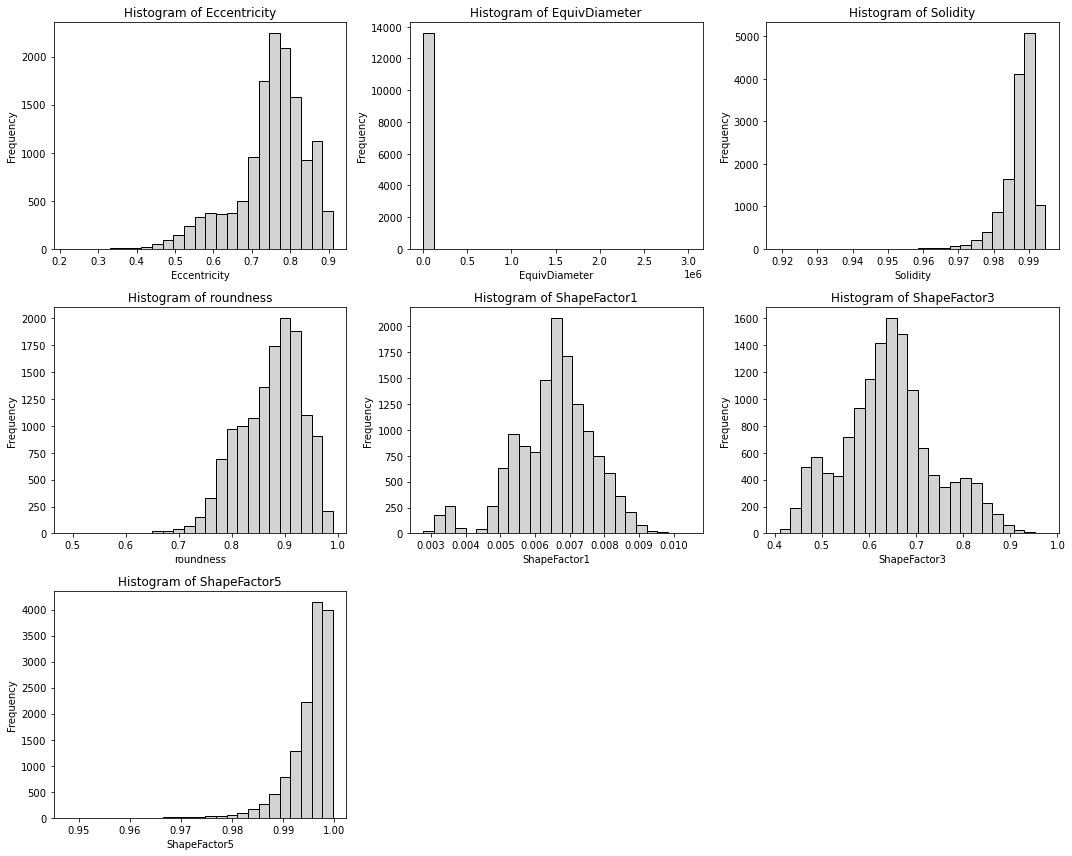

In [76]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the 3x3 array of axes for easier indexing
axs = axs.flatten()

# Plot each histogram on a subplot
df['Eccentricity'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[0])
axs[0].set_title('Histogram of Eccentricity')
axs[0].set_xlabel('Eccentricity')
axs[0].set_ylabel('Frequency')

df['EquivDiameter'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[1])
axs[1].set_title('Histogram of EquivDiameter')
axs[1].set_xlabel('EquivDiameter')
axs[1].set_ylabel('Frequency')

df['Solidity'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[2])
axs[2].set_title('Histogram of Solidity')
axs[2].set_xlabel('Solidity')
axs[2].set_ylabel('Frequency')

df['roundness'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[3])
axs[3].set_title('Histogram of roundness')
axs[3].set_xlabel('roundness')
axs[3].set_ylabel('Frequency')

df['ShapeFactor1'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[4])
axs[4].set_title('Histogram of ShapeFactor1')
axs[4].set_xlabel('ShapeFactor1')
axs[4].set_ylabel('Frequency')

df['ShapeFactor3'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[5])
axs[5].set_title('Histogram of ShapeFactor3')
axs[5].set_xlabel('ShapeFactor3')
axs[5].set_ylabel('Frequency')

df['ShapeFactor5'].plot(kind='hist', bins=25, edgecolor='black', color='lightgrey', ax=axs[6])
axs[6].set_title('Histogram of ShapeFactor5')
axs[6].set_xlabel('ShapeFactor5')
axs[6].set_ylabel('Frequency')

# Hide unused subplots in the last row
for i in range(7, 9):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# class imbalance

In [77]:
df['Class'].value_counts()

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64

Bombay is a minority class

In [78]:
df['Class']

0            CALI
1        DERMASON
2           SEKER
3          BOMBAY
4            SIRA
           ...   
13606    DERMASON
13607    BARBUNYA
13608    BARBUNYA
13609       HOROZ
13610        SIRA
Name: Class, Length: 13594, dtype: object

# Decision trees

In [79]:
df = pd.get_dummies(df,columns=['Colour'],drop_first=False)

In [80]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
Constantness         int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6       float64
Class               object
Sort order         float64
Colour_black         uint8
Colour_brown         uint8
Colour_green         uint8
Colour_white         uint8
dtype: object

In [81]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)

## Using weights

In [83]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [84]:
clf.tree_.node_count

299

In [86]:
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
print(f"train f1-score: {f1_score(y_train, y_pred_train, average='weighted')}")
print(f"validation f1-score: {f1_score(y_val, y_pred_val, average='weighted')}")
print(f"Test f1-score: {f1_score(y_val, y_pred_val, average='weighted')}")

train f1-score: 1.0
validation f1-score: 0.9785660380800123
Test f1-score: 0.9785660380800123


In [87]:
clf = DecisionTreeClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)

# Compute the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [88]:
clfs = []  # To store the trained classifiers
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [89]:
train_scores = [f1_score(y_train, clf.predict(X_train),average='weighted') for clf in clfs]
test_scores = [f1_score(y_val, clf.predict(X_val),average="weighted") for clf in clfs]

# Find the index of the tree with the highest test accuracy
best_index = np.argmax(test_scores)
best_ccp_alpha = ccp_alphas[best_index]

print(f"Best ccp_alpha: {best_ccp_alpha:.5f}")
print(f"Train f1-score: {train_scores[best_index]:.4f}")
print(f"val f1-score: {test_scores[best_index]:.4f}")

Best ccp_alpha: 0.00022
Train f1-score: 0.9958
val f1-score: 0.9807


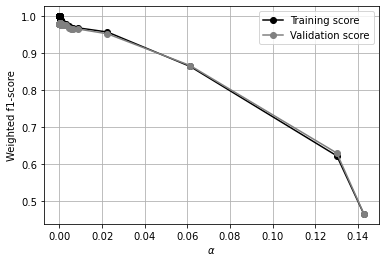

In [90]:
plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='Training score', color='black')

# Plot validation accuracy
plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='Validation score', color='grey')

plt.xlabel(r'$\alpha$')
plt.ylabel('Weighted f1-score')

plt.grid(True)
plt.legend()
plt.show()

In [91]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,ccp_alpha=0.00022)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00022, class_weight='balanced',
                       random_state=42)

In [92]:
clf.tree_.node_count

161

In [93]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9731518940787054

In [94]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_weighted

0.9731202373862126

## upsampling with smote

In [95]:
df_merge = pd.concat([X_train, y_train], axis=1)

In [96]:
df_nan = df_merge[df_merge.isna().any(axis=1)]
df_clean = df_merge.dropna()

In [97]:
X_train_temp = df_clean.drop('Class',axis=1)
y_train_temp = df_clean['Class']

In [98]:
smote = SMOTE(sampling_strategy={'BOMBAY': 848}, random_state=42)
X_train, y_train = smote.fit_resample(X_train_temp, y_train_temp)

In [99]:
df_merge = pd.concat([X_train, y_train], axis=1)
df_merge = pd.concat([df_merge, df_nan], axis=0)

In [100]:
X_train = df_merge.drop('Class',axis=1)
y_train=df_merge['Class']

In [101]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
clf.tree_.node_count

271

In [103]:
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
print(f"train f1-score: {f1_score(y_train, y_pred_train, average='weighted')}")
print(f"validation f1-score: {f1_score(y_val, y_pred_val, average='weighted')}")

train f1-score: 1.0
validation f1-score: 0.9781736383937266


In [104]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [105]:
clfs = []  # To store the trained classifiers
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [106]:
train_scores = [f1_score(y_train, clf.predict(X_train),average='weighted') for clf in clfs]
test_scores = [f1_score(y_val, clf.predict(X_val),average='weighted') for clf in clfs]

# Find the index of the tree with the highest test accuracy
best_index = np.argmax(test_scores)
best_ccp_alpha = ccp_alphas[best_index]

print(f"Best ccp_alpha: {best_ccp_alpha:.5f}")
print(f"Train f1-score: {train_scores[best_index]:.4f}")
print(f"Test f1-score: {test_scores[best_index]:.4f}")

Best ccp_alpha: 0.00011
Train f1-score: 0.9970
Test f1-score: 0.9807


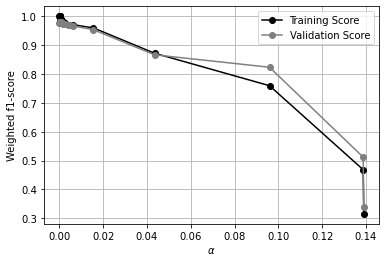

In [107]:
plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='Training Score', color='black')

# Plot validation accuracy
plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='Validation Score', color='grey')

plt.xlabel(r'$\alpha$')
plt.ylabel('Weighted f1-score')

plt.grid(True)
plt.legend()
plt.show()

In [108]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,ccp_alpha=0.00011)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00011, class_weight='balanced',
                       random_state=42)

In [109]:
clf.tree_.node_count

261

In [110]:
y_pred = clf.predict(X_test)
f1_score(y_pred,y_test,average='weighted')

0.9709555253246058

# KNN

In [174]:
df = pd.read_excel("DryBeanDataSet.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [175]:
df.replace('?', np.nan, inplace=True)

In [176]:
df.dropna(subset=['Class'], inplace=True)

## remove missing values

In [177]:
for i in df.columns:
    df_temp = df[i]
    print(df_temp[pd.isnull(df_temp)])

Series([], Name: Area, dtype: int64)
Series([], Name: Perimeter, dtype: float64)
Series([], Name: MajorAxisLength, dtype: float64)
Series([], Name: MinorAxisLength, dtype: float64)
Series([], Name: AspectRation, dtype: float64)
Series([], Name: Eccentricity, dtype: float64)
Series([], Name: ConvexArea, dtype: int64)
Series([], Name: Constantness, dtype: int64)
Series([], Name: EquivDiameter, dtype: float64)
1175    NaN
2316    NaN
2317    NaN
3003    NaN
3149    NaN
3156    NaN
Name: Colour, dtype: object
2831   NaN
2832   NaN
5125   NaN
5846   NaN
5999   NaN
6681   NaN
Name: Extent, dtype: float64
Series([], Name: Solidity, dtype: float64)
Series([], Name: roundness, dtype: float64)
104     NaN
484     NaN
788     NaN
902     NaN
1244    NaN
2042    NaN
2803    NaN
3982    NaN
5963    NaN
8813    NaN
9701    NaN
9702    NaN
9914    NaN
10015   NaN
10134   NaN
10234   NaN
10294   NaN
10325   NaN
Name: Compactness, dtype: float64
Series([], Name: ShapeFactor1, dtype: float64)
Series([],

In [178]:
for i in df[df['Colour'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Colour'] = df[df['Class'] == class_]['Colour'].mode()[0]

In [179]:
for i in df[df['Extent'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Extent'] = df[df['Class'] == class_]['Extent'].median()

In [180]:
for i in df[df['Compactness'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Compactness'] = df[df['Class'] == class_]['Compactness'].median()

In [181]:
for i in df[df['ShapeFactor6'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'ShapeFactor6'] = df[df['Class'] == class_]['ShapeFactor6'].median()

## One hot encode and split and scaling

In [182]:
df = pd.get_dummies(df,columns=['Colour'],drop_first=False)

In [183]:
X = df.drop('Class',axis=1)
y = df['Class']

In [184]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)

## Tomek links

In [185]:
# Instantiate TomekLinks
tomek = TomekLinks()

# Fit and resample the data
X_resampled, y_resampled = tomek.fit_resample(X_train, y_train)

In [186]:
X_train.shape[0]-X_resampled.shape[0]

1322

In [187]:
y_resampled.value_counts()

DERMASON    1954
SIRA        1385
SEKER       1063
HOROZ       1050
CALI         791
BARBUNYA     593
BOMBAY       324
Name: Class, dtype: int64

In [188]:
324/y_resampled.shape[0]

0.045251396648044694

In [189]:
X_train = X_resampled
y_train=y_resampled

## weighted KNN

In [190]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Best K: 13
Weighted F1-Score on Validation Set: 0.980815742037039


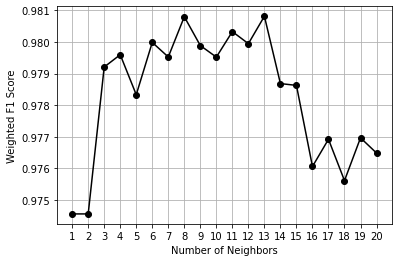

In [191]:
# Define a range for K
k_values = np.arange(1, 21)  # Example range for K from 1 to 20

# Initialize lists to store K values and their corresponding F1 scores
f1_scores = []

# Manual grid search
for k in k_values:
    # Create and fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val_scaled)

    # Calculate weighted F1-score
    current_f1_score = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(current_f1_score)

# Find the best K and its corresponding F1 score
best_k = k_values[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Print results
print(f'Best K: {best_k}')
print(f'Weighted F1-Score on Validation Set: {best_f1_score}')

# Plot K values vs. weighted F1-scores
#plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('Weighted F1 Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [192]:
clf = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [193]:
f1_score(y_train,clf.predict(X_train_scaled),average='weighted')

1.0

In [194]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred = clf.predict(X_test_scaled)

In [195]:
f1_score(y_pred,y_test,average='weighted')

0.9710655303562425

## upsampling

In [196]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)

In [197]:
X_train = X_resampled
y_train=y_resampled

In [198]:
y_train.value_counts()

DERMASON    1954
SIRA        1385
SEKER       1063
HOROZ       1050
CALI         791
BARBUNYA     593
BOMBAY       324
Name: Class, dtype: int64

In [199]:
df_merge = pd.concat([X_train, y_train], axis=1)

In [200]:
df_nan = df_merge[df_merge.isna().any(axis=1)]
df_clean = df_merge.dropna()

In [201]:
X_train_temp = df_clean.drop('Class',axis=1)
y_train_temp = df_clean['Class']

In [202]:
smote = SMOTE(sampling_strategy={'BOMBAY': 827}, random_state=42)
X_train, y_train = smote.fit_resample(X_train_temp, y_train_temp)

In [203]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train = pd.concat([df_train, df_nan], axis=0)

In [204]:
X_train = df_train.drop('Class',axis=1)
y_train=df_train['Class']

In [205]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Best K: 6
Weighted F1-Score on Validation Set: 0.981327182836787


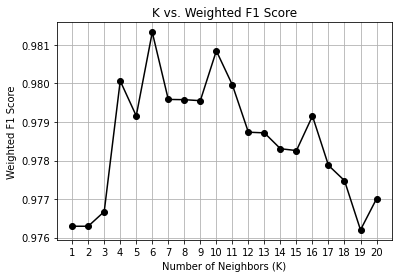

In [206]:
# Define a range for K
k_values = np.arange(1, 21)  # Example range for K from 1 to 20

# Initialize lists to store K values and their corresponding F1 scores
f1_scores = []

# Manual grid search
for k in k_values:
    # Create and fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val_scaled)

    # Calculate weighted F1-score
    current_f1_score = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(current_f1_score)

# Find the best K and its corresponding F1 score
best_k = k_values[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Print results
print(f'Best K: {best_k}')
print(f'Weighted F1-Score on Validation Set: {best_f1_score}')

# Plot K values vs. weighted F1-scores

plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='black')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Weighted F1 Score')
plt.title('K vs. Weighted F1 Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [207]:
clf = KNeighborsClassifier(n_neighbors=6,weights='distance')
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [211]:
f1_score(y_train,clf.predict(X_train_scaled),average='weighted')

1.0

In [208]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred = clf.predict(X_test_scaled)

In [209]:
f1_score(y_pred,y_test,average='weighted')

0.976393303537428

# Final comparison

## Decision tree

In [148]:
df = pd.read_excel("DryBeanDataSet.xlsx")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [149]:
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['Class'], inplace=True)

In [150]:
df = pd.get_dummies(df,columns=['Colour'],drop_first=False)

In [151]:
X = df.drop('Class',axis=1)
y = df['Class']

In [163]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,ccp_alpha=0.00022)
cross_val_score(clf, X, y, cv=10,scoring='f1_weighted').mean()

0.979824387121216

## KNN

In [212]:
df = pd.read_excel("DryBeanDataSet.xlsx")
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['Class'], inplace=True)

In [213]:
for i in df[df['Colour'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Colour'] = df[df['Class'] == class_]['Colour'].mode()[0]
    
for i in df[df['Extent'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Extent'] = df[df['Class'] == class_]['Extent'].median()  
    
for i in df[df['Compactness'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'Compactness'] = df[df['Class'] == class_]['Compactness'].median()
    
for i in df[df['ShapeFactor6'].isna()].index:
    class_ = df.loc[i,'Class']
    df.loc[i,'ShapeFactor6'] = df[df['Class'] == class_]['ShapeFactor6'].median()

In [214]:
df = pd.get_dummies(df,columns=['Colour'],drop_first=False)

In [215]:
X = df.drop('Class',axis=1)
y = df['Class']

In [216]:
# Instantiate TomekLinks
tomek = TomekLinks()

# Fit and resample the data
X_resampled, y_resampled = tomek.fit_resample(X_train, y_train)

In [217]:
X = X_resampled
y = y_resampled 

In [218]:
df_merge = pd.concat([X, y], axis=1)

df_nan = df_merge[df_merge.isna().any(axis=1)]
df_clean = df_merge.dropna()

X_temp = df_clean.drop('Class',axis=1)
y_temp = df_clean['Class']

smote = SMOTE(sampling_strategy={'BOMBAY': 827}, random_state=42)
X, y = smote.fit_resample(X_temp, y_temp)

df = pd.concat([X, y], axis=1)
df = pd.concat([df, df_nan], axis=0)

X = df_train.drop('Class',axis=1)
y = df_train['Class']

In [219]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [220]:
clf = KNeighborsClassifier(n_neighbors=6,weights='distance')
cross_val_score(clf, X_scaled, y, cv=10,scoring='f1_weighted').mean()

0.9838270189355223